# Statistical Learning Tutorial for Beginners

Based on https://www.kaggle.com/kanncaa1/statistical-learning-tutorial-for-beginners

In [8]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go

# from pandas.tools import plotting
from scipy import stats
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [9]:
# Loading the df in
filepath = 'data.csv'

df = pd.read_csv(filepath)
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [10]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [11]:
# Cleaning data
df = df.drop(['id', 'Unnamed: 32'], axis=1)

# Histograms

<li> Used to represent how many times each value appears in a dataset, i.e. distribution of variable
<li> Frequency of each value (how many times it appears)
<li> e.g. [1,1,1,1,2,2,2]. Frequency of 1 is 4 and frequency of 2 is 3.

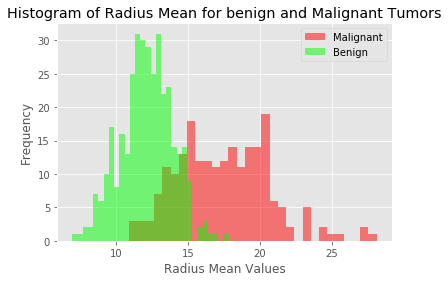

Most frequent malignant radius mean is:  20.101999999999997


In [12]:
m = plt.hist(df[df["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(df[df["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Benign")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for benign and Malignant Tumors")
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)

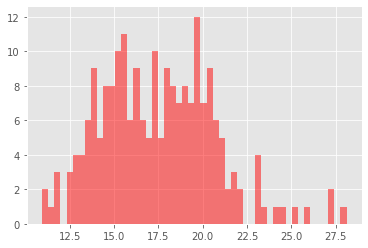

In [13]:
m = plt.hist(df[df["diagnosis"] == "M"].radius_mean,bins=50, fc = (1,0,0,0.5),label = "Malignant")

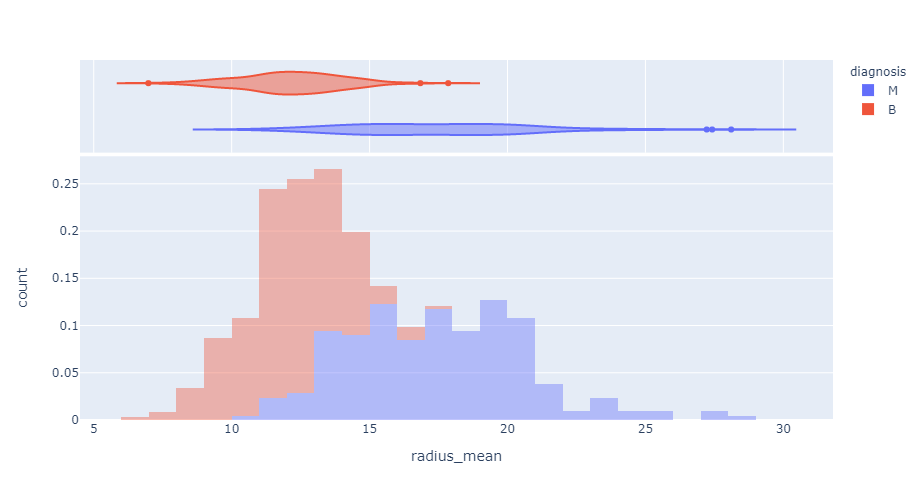

Graph shows that malignant tumours are much bigger than benign tumours


In [14]:
# Plotting in plotly

fig = px.histogram(
    df, 
    x='radius_mean', 
    color='diagnosis', 
    marginal='violin',
    histnorm='probability',
    nbins = 30, 
    opacity = 0.4, 
    width = 800, 
    height = 500)

fig.show()
print('Graph shows that malignant tumours are much bigger than benign tumours')

# Calculating outliers

In [8]:
df_benign = df[df['diagnosis'] == 'B']
df_malignant = df[df['diagnosis'] == 'M']

desc_b = df_benign.radius_mean.describe()
desc_b

count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64

In [9]:
# Take the 25% and 75% values from the description
Q1 = desc_b[4]
Q3 = desc_b[6]

print('The upper quartile is %s, and the lower quartile is %s.' % (Q1, Q3))

The upper quartile is 11.08, and the lower quartile is 13.37.


In [10]:
# Finding the interquartile range

IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print('The IQR is %s. \nThe lower_bound is %s.\nThe upper_bound is %s. \nAnything outside these values is an outlier.' % (IQR, lower_bound, upper_bound))

The IQR is 2.289999999999999. 
The lower_bound is 7.645000000000001.
The upper_bound is 16.805. 
Anything outside these values is an outlier.


In [11]:
# Check if there are any values in the radius_mean column that has less than the lower_bound value
lower_outliers = df_benign[df_benign.radius_mean < lower_bound].radius_mean
upper_outliers = df_benign[df_benign.radius_mean > upper_bound].radius_mean

print('Outliers: (%s,%s)' % (lower_outliers, upper_outliers))

Outliers: (101    6.981
Name: radius_mean, dtype: float64,157    16.84
491    17.85
Name: radius_mean, dtype: float64)


In [12]:
# Converts the highlighted values into values
# The values() method returns a view object that displays a list of all the values in the dictionary.

lower_outliers = df_benign[df_benign.radius_mean < lower_bound].radius_mean.values
upper_outliers = df_benign[df_benign.radius_mean > upper_bound].radius_mean.values

print('Outliers: (%s,%s)' % (lower_outliers, upper_outliers))

Outliers: ([6.981],[16.84 17.85])


In [13]:
print("Outliers: ",df_benign[(df_benign.radius_mean < lower_bound) | (df_benign.radius_mean > upper_bound)].radius_mean.values)

Outliers:  [ 6.981 16.84  17.85 ]


# Using box plots to highlight outliers

In [14]:
# Extracting selected columns
df[['diagnosis', 'radius_mean', 'texture_mean']]

diagnosis  radius_mean  texture_mean
0           M        17.99         10.38
1           M        20.57         17.77
2           M        19.69         21.25
3           M        11.42         20.38
4           M        20.29         14.34
..        ...          ...           ...
564         M        21.56         22.39
565         M        20.13         28.25
566         M        16.60         28.08
567         M        20.60         29.33
568         B         7.76         24.54

[569 rows x 3 columns]

In [15]:
# Melting the dataframe to focus on diagnosis, basically merging the columns into 3 
melted_data = pd.melt(df, id_vars = 'diagnosis', value_vars=['radius_mean', 'texture_mean'])
melted_data

diagnosis      variable  value
0            M   radius_mean  17.99
1            M   radius_mean  20.57
2            M   radius_mean  19.69
3            M   radius_mean  11.42
4            M   radius_mean  20.29
...        ...           ...    ...
1133         M  texture_mean  22.39
1134         M  texture_mean  28.25
1135         M  texture_mean  28.08
1136         M  texture_mean  29.33
1137         B  texture_mean  24.54

[1138 rows x 3 columns]

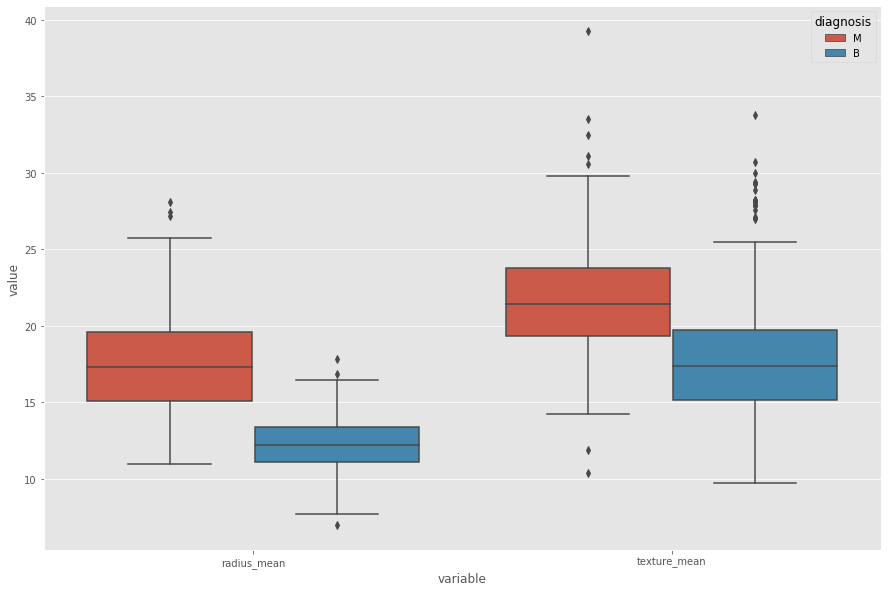

In [16]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'variable', y = 'value', hue='diagnosis', data = melted_data)
plt.show()

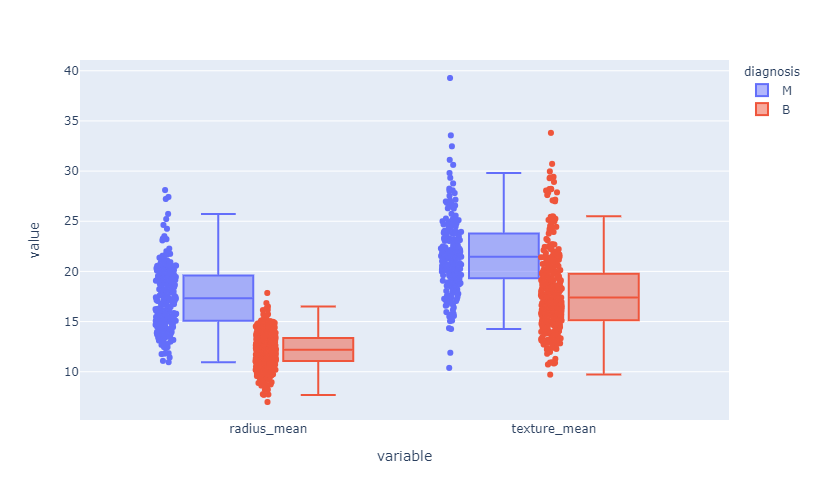

In [17]:
# Plotting with plotly
# The ends of the box represent the lower and upper quartiles, while the median (second quartile) is marked by a line inside the box.

fig = px.box(melted_data, x='variable', y='value', color = 'diagnosis', points = 'all', width = 800, height = 500)
fig.show()

# Summary statistics

In [18]:
# Variance is the average of the squared differences from the mean

print("mean: ",df_benign.radius_mean.mean())
print("variance: ",df_benign.radius_mean.var()) # spread of distribution, STD^2
print("standart deviation (std): ",df_benign.radius_mean.std()) # square root of variance
print("describe method: ",df_benign.radius_mean.describe())

mean:  12.14652380952381
variance:  3.170221722043872
standart deviation (std):  1.7805116461410389
describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


# Cumulative distribution function CDF

<li> The probability that the variable takes a value less than or equal to x. P(X < = x)
<li> e.g. What is the P(12 < X) for the radius mean? Should be 0.5

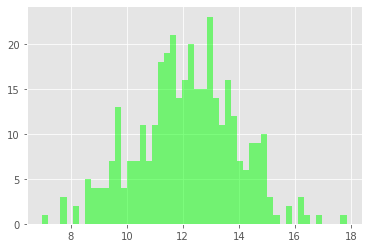

In [19]:
plt.hist(df_benign.radius_mean, bins=50, fc=(0,1,0,0.5), label='Benign', normed = False, cumulative = False) 

plt.show()

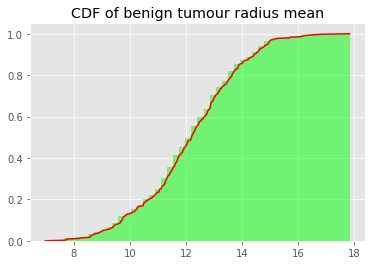

In [20]:
# Add normalisation (1 is the highest) and cumulative counts

plt.hist(df_benign.radius_mean, bins=50, fc=(0,1,0,0.5), label='Benign', normed = True, cumulative = True) 

# Adding on a lineplot in addition to the CDF plot
# Sort the data in ascending order
sorted_data = np.sort(df_benign.radius_mean)

# Create a list with set intervals equivalent to the len(dataset) and normalising it
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='red')
plt.title('CDF of benign tumour radius mean')
plt.show()

In [21]:
l1 = len(sorted_data)
l1

357

In [22]:
# The -1 is here as the index starts with 0, so the last value on the list will be 1

l2 = float(len(sorted_data))-1
l2

356.0

In [23]:
np.arange(l1)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [24]:
np.arange(l1)/l2

array([0.        , 0.00280899, 0.00561798, 0.00842697, 0.01123596,
       0.01404494, 0.01685393, 0.01966292, 0.02247191, 0.0252809 ,
       0.02808989, 0.03089888, 0.03370787, 0.03651685, 0.03932584,
       0.04213483, 0.04494382, 0.04775281, 0.0505618 , 0.05337079,
       0.05617978, 0.05898876, 0.06179775, 0.06460674, 0.06741573,
       0.07022472, 0.07303371, 0.0758427 , 0.07865169, 0.08146067,
       0.08426966, 0.08707865, 0.08988764, 0.09269663, 0.09550562,
       0.09831461, 0.1011236 , 0.10393258, 0.10674157, 0.10955056,
       0.11235955, 0.11516854, 0.11797753, 0.12078652, 0.12359551,
       0.12640449, 0.12921348, 0.13202247, 0.13483146, 0.13764045,
       0.14044944, 0.14325843, 0.14606742, 0.1488764 , 0.15168539,
       0.15449438, 0.15730337, 0.16011236, 0.16292135, 0.16573034,
       0.16853933, 0.17134831, 0.1741573 , 0.17696629, 0.17977528,
       0.18258427, 0.18539326, 0.18820225, 0.19101124, 0.19382022,
       0.19662921, 0.1994382 , 0.20224719, 0.20505618, 0.20786

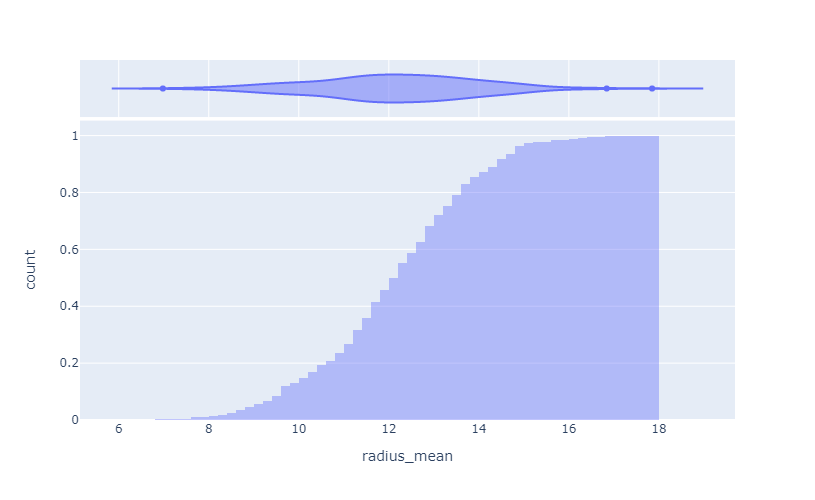

Graph shows that malignant tumours are much bigger than benign tumours


In [25]:
# Plotting in plotly CANNOT ADD LINE TRACES WITH PLOTLY

fig = px.histogram(
    df_benign, 
    x='radius_mean', 
    marginal='violin',
    histnorm='probability',
    cumulative=True,
    nbins = 100, 
    opacity = 0.4, 
    width = 800, 
    height = 500)

fig.show()
print('Graph shows that malignant tumours are much bigger than benign tumours')

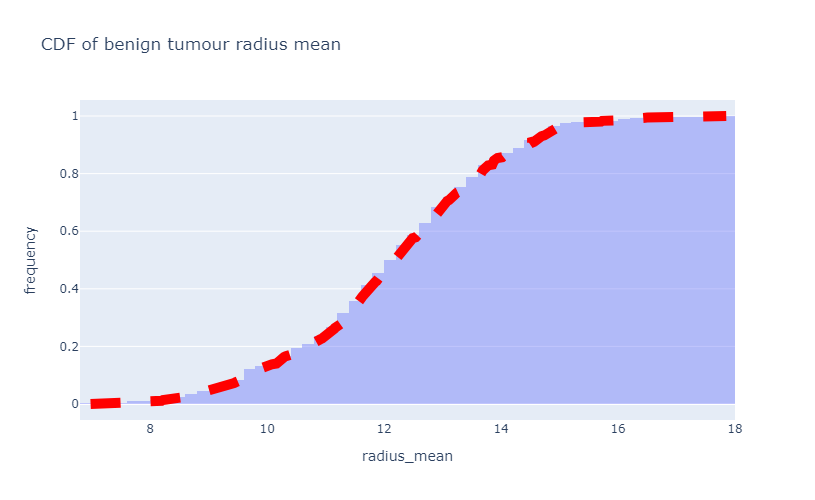

In [26]:
fig = go.Figure(data=[go.Histogram(
    x=df_benign['radius_mean'],
    histnorm='probability', 
    cumulative_enabled=True,
    nbinsx = 100,
    opacity = 0.4)])

fig.add_trace(go.Scatter(x=sorted_data, y=y, line = dict(color='red', width=10, dash='dash') ))

fig.update_layout(
    width = 800,
    height = 500, 
    title_text = 'CDF of benign tumour radius mean',
    xaxis_title_text = 'radius_mean',
    yaxis_title_text = 'frequency',
    showlegend = False)

fig.show()

# Effect size

<li> Describes the size of an effect, quantifying the difference between two groups
<li> (Cohen) Effect size is a quantitative measure of the magnitude of the experimenter effect. 
<li> The larger the effect size the stronger the relationship between two variables.
<li> Cohen suggest that if d(effect size)= 0.2, it is small effect size, d = 0.5 medium effect size, d = 0.8 large effect size.    

<img src = https://www.simplypsychology.org/cohen-d-formula.gif>

In [27]:
mean_diff = df_malignant.radius_mean.mean() - df_benign.radius_mean.mean()
mean_diff

5.316306379155439

In [28]:
var_benign = df_benign.radius_mean.var()
var_benign

3.170221722043872

In [29]:
var_malignant = df_malignant.radius_mean.var()
var_malignant

10.265430814629346

In [30]:
len(df_malignant)*var_malignant

2176.271332701421

In [31]:
len(df_benign)*var_benign

1131.7691547696622

In [32]:
float(len(df_benign)+ len(df_malignant))

569.0

In [33]:
# Variability max of benign + max of malignant divided by number of rows in both datasets

var_pooled = (len(df_benign)*var_benign + len(df_malignant)*var_malignant)/float(len(df_benign)+ len(df_malignant))
var_pooled

5.813779415590656

In [34]:
# Cohen effect size

effect_size = mean_diff/np.sqrt(var_pooled)
effect_size

print(effect_size, 'Effect size is 2.2, that is too big and says that two groups are different from each other as we expect. Because our groups are bening radius mean and malignant radius mean that are different from each other')

2.2048585165041428 Effect size is 2.2, that is too big and says that two groups are different from each other as we expect. Because our groups are bening radius mean and malignant radius mean that are different from each other


# Relationship between variables

<Figure size 1080x720 with 0 Axes>

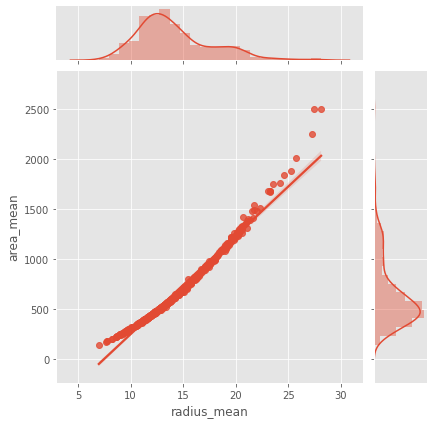

Shows these two variables are strongly correlated to each other.


In [35]:
# Using a scatterplot to check the relationship between radius mean and area mean

plt.figure(figsize = (15,10))
sns.jointplot(df.radius_mean,df.area_mean,kind="regg")
plt.show()

print('Shows these two variables are strongly correlated to each other.')

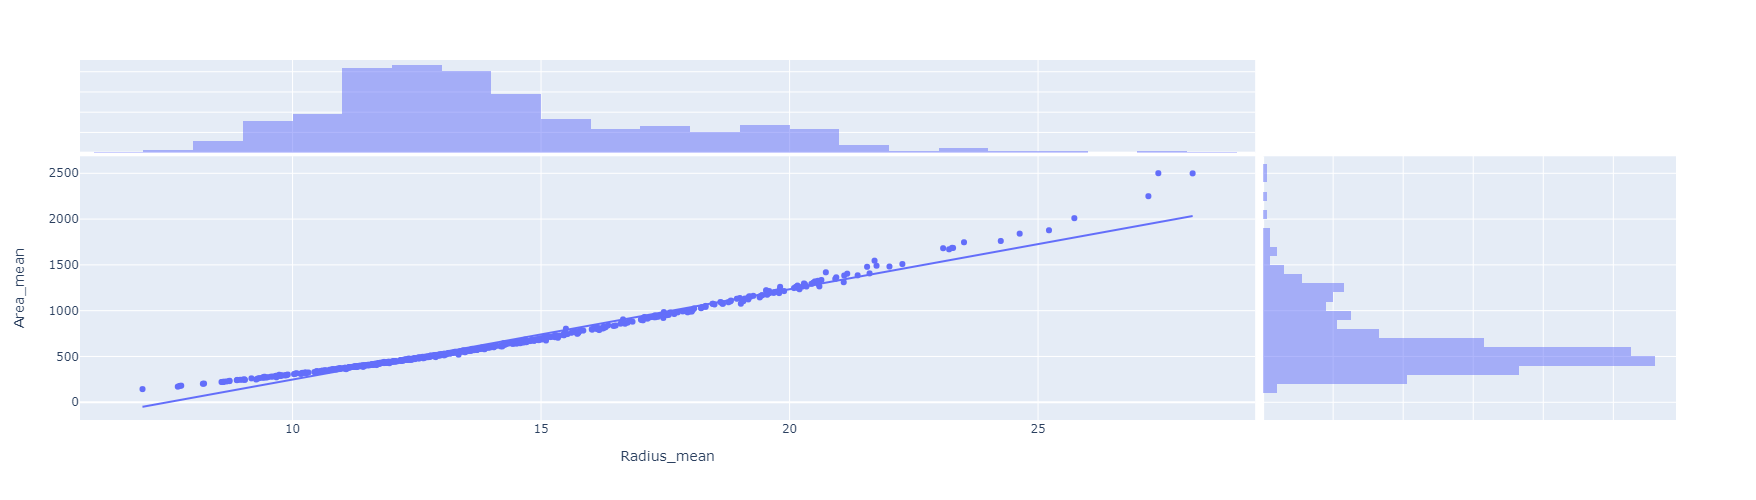

In [36]:
# Attempting the same plot in plotly but can't seem to edit the marginal plot

fig = px.scatter(x=df.radius_mean, y=df.area_mean, trendline='ols', marginal_x="histogram", marginal_y="histogram", width = 500, height = 500)

fig.update_layout( 
    xaxis_title_text = 'Radius_mean',
    yaxis_title_text = 'Area_mean')

fig.show()

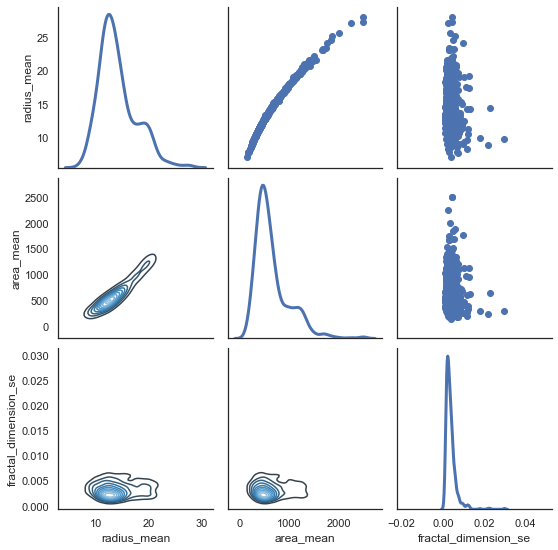

In [37]:
# Also we can look relationship between more than 2 distribution
sns.set(style = "white")
df2 = df.loc[:,["radius_mean","area_mean","fractal_dimension_se"]]
g = sns.PairGrid(df2,diag_sharey = False,)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw =3)
plt.show()

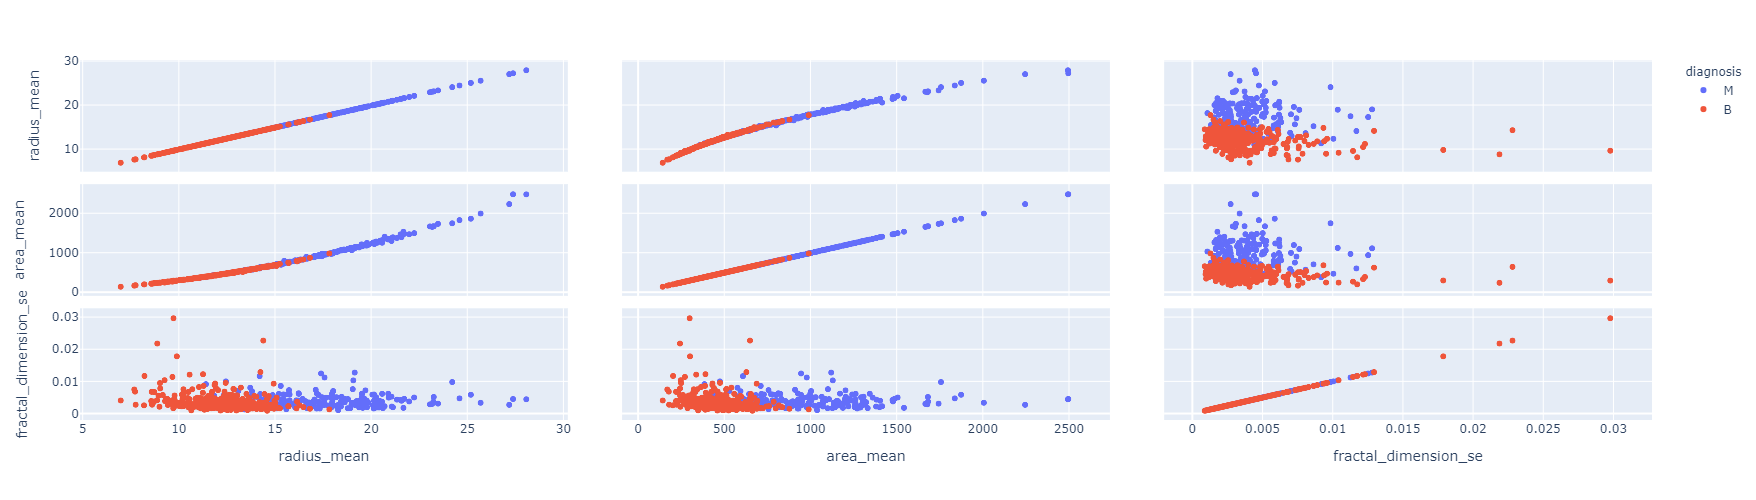

In [38]:
# Same thing but in plotly

import plotly.express as px
fig = px.scatter_matrix(df, dimensions=['radius_mean', 'area_mean', 'fractal_dimension_se'], color='diagnosis',  width = 500, height = 500)
fig.show()

# Correlation

<li> Checks the strength of relationship between 2 variables

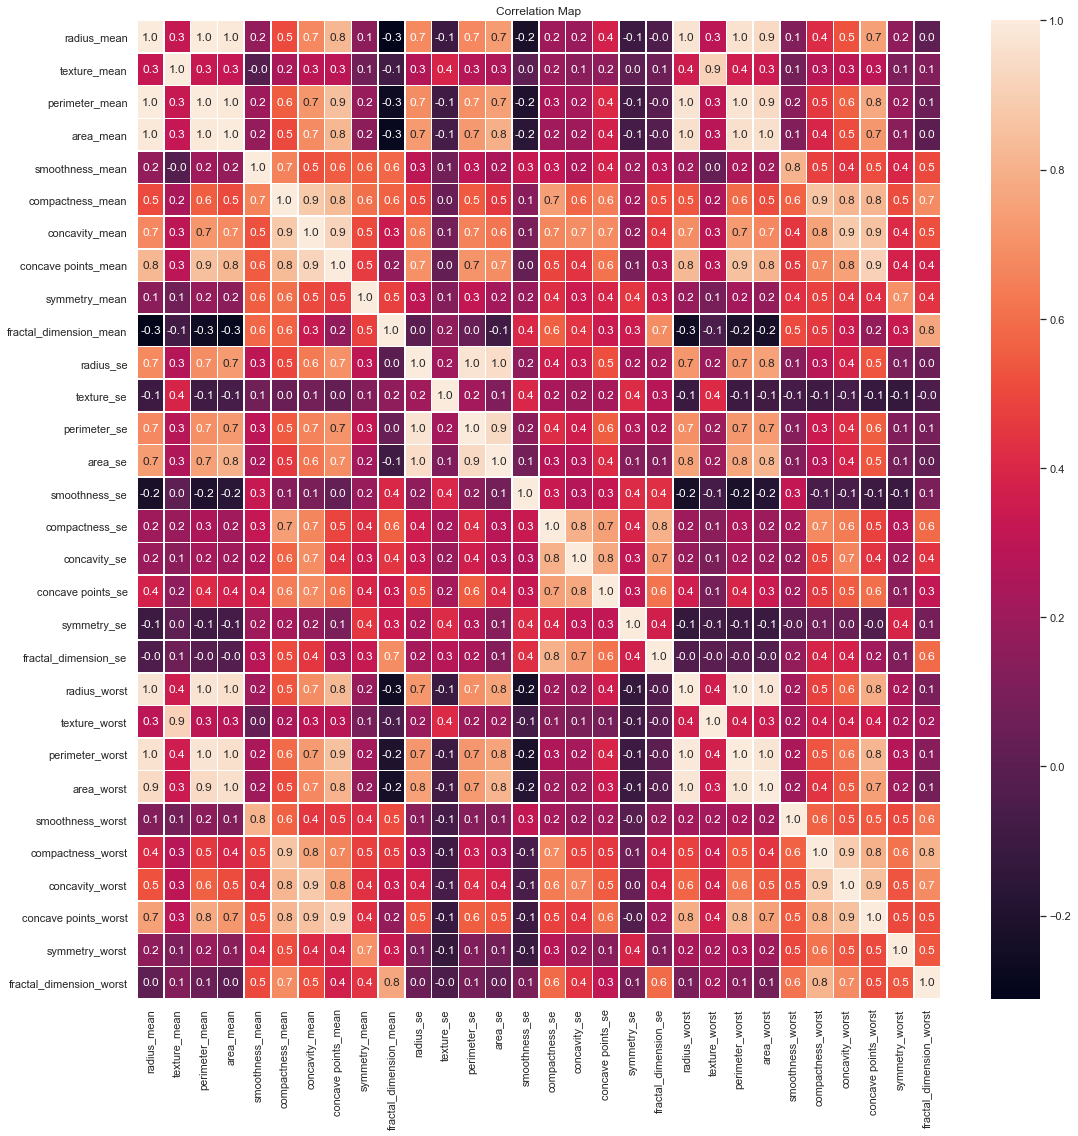

In [39]:
# Heatmaps are only viable with SNS plots, plotly doesn't support dataframes in heatmaps

f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

<li> Huge matrix that includes a lot of numbers
<li> The range of this numbers are -1 to 1.
<li> Meaning of 1 is two variable are positively correlated with each other like radius mean and area mean
<li> Meaning of zero is there is no correlation between variables like radius mean and fractal dimension se
<li> Meaning of -1 is two variables are negatively correlated with each other like radius mean and fractal dimension mean.
<li> Actually correlation between of them is not -1, it is -0.3 but the idea is that if sign of correlation is negative that means that there is negative correlation.

# Covariance

<li> A measure of the tendency of two variables to vary together
<li> Covariance would therefore be maximised if two vectors are identical

In [40]:
np.cov(df.radius_mean,df.area_mean)

array([[1.24189201e+01, 1.22448341e+03],
       [1.22448341e+03, 1.23843554e+05]])

In [41]:
df.radius_mean.cov(df.area_mean)

1224.4834093464567

In [42]:
np.cov(df.radius_mean,df.area_mean)
print("Covariance between radius mean and area mean: ",df.radius_mean.cov(df.area_mean))
print("Covariance between radius mean and fractal dimension se: ",df.radius_mean.cov(df.fractal_dimension_se))

Covariance between radius mean and area mean:  1224.4834093464567
Covariance between radius mean and fractal dimension se:  -0.0003976248576440627


# Pearson Correlation

<li> Division of covariance by standard deviation of variables
<li> Lets look at pearson correlation between radius mean and area mean
<li> First lets use .corr() method that we used actually at correlation part. In correlation part we actually used pearson correlation :)
<li> p1 and p2 is the same. In p1 we use corr() method, in p2 we apply definition of pearson correlation (cov(A,B)/(std(A)*std(B)))
<li> As we expect pearson correlation between area_mean and area_mean is 1 that means that they are same distribution
<li> Also pearson correlation between area_mean and radius_mean is 0.98 that means that they are positively correlated with each other and relationship between of the is very high.
<li> To be more clear what we did at correlation part and pearson correlation part is same.

In [43]:
p1 = df.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
p2 = df.radius_mean.cov(df.area_mean)/(df.radius_mean.std()*df.area_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson correlation:  0.987357170056613


# Spearman's Rank Correlation
* Pearson correlation works well if the relationship between variables are linear and variables are roughly normal. But it is not robust, if there are outliers
* To compute spearman's correlation we need to compute rank of each value
* Spearman's correlation is little higher than pearson correlation
    * If relationship between distributions are non linear, spearman's correlation tends to better estimate the strength of relationship
    * Pearson correlation can be affected by outliers. Spearman's correlation is more robust.

In [44]:
df.rank() # What does this do???

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0        463.5        476.5           2.0           492.0      478.0   
1        463.5        540.0         223.0           528.5      544.0   
2        463.5        519.0         396.5           517.5      516.0   
3        463.5        118.0         364.0           173.0      100.0   
4        463.5        532.0          64.0           539.0      537.0   
..         ...          ...           ...             ...        ...   
564      463.5        552.0         453.0           550.0      553.0   
565      463.5        526.0         554.0           524.0      529.0   
566      463.5        446.0         549.0           442.0      447.0   
567      463.5        543.0         558.0           547.0      532.0   
568      179.0          4.0         503.0             2.0        4.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0              538.0             564.0           554.0                553.5   
1              125.0             222.0           343.0                421.0   
2              478.0             489.5           507.5                543.0   
3              567.0             566.0           538.0                519.0   
4              357.5             441.0           510.0                517.5   
..               ...               ...             ...                  ...   
564            489.0             381.0           541.0                549.0   
565            316.0             322.0           444.0                508.0   
566            120.0             318.0           351.0                358.0   
567            536.0             563.0           563.0                559.0   
568              1.0              39.0             7.0                  7.0   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0            554.0  ...         538.0           45.0            552.5   
1            306.0  ...         532.0          224.0            514.5   
2            477.5  ...         511.0          295.0            504.0   
3            564.0  ...         281.0          337.0            295.0   
4            302.0  ...         492.0           30.0            500.5   
..             ...  ...           ...            ...              ...   
564          236.0  ...         539.0          331.0            532.0   
565          256.0  ...         513.0          553.0            508.0   
566          118.0  ...         429.0          519.0            430.0   
567          550.5  ...         544.0          559.0            552.5   
568          114.0  ...           9.0          439.0              8.0   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0         542.0             513.0              557.0            551.0   
1         537.0             207.0              232.0            299.0   
2         516.0             416.0              503.0            468.0   
3         203.0             567.0              565.0            542.0   
4         493.0             338.5              271.0            443.0   
..          ...               ...                ...              ...   
564       544.0             376.0              281.0            452.0   
565       518.0             143.0              241.0            374.0   
566       432.0             123.5              405.0            391.0   
567       528.0             525.0              566.0            565.0   
568         8.0              11.0               18.0              7.0   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                   561.0           555.0                    539.0  
1                   476.0           254.0                    399.0  
2                   545.0           514.5                    384.0  
3                   557.0           569.0                    568.0  
4                   428.5            90.5                    226.0  
..                    .

In [45]:
ranked_data = df.rank()
spearman_corr = ranked_data.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
print("Spearman's correlation: ")
print(spearman_corr)

Spearman's correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.999602
radius_mean   0.999602     1.000000


# Mean vs Median

* Sometimes instead of mean we need to use median. I am going to explain why we need to use median with an example
* Lets think that there are 10 people who work in a company. Boss of the company will make raise in their salary if their mean of salary is smaller than 5

In [46]:
salary = [1,4,3,2,5,4,2,3,1,500]
print("Mean of salary: ",np.mean(salary))

Mean of salary:  52.5


Median avoids outliers

In [47]:
print("Median of salary: ",np.median(salary))

Median of salary:  3.0


# Hypothesis testing

In [48]:
# ???
statistic, p_value = stats.ttest_rel(df.radius_mean,df.area_mean)
print('p-value: ',p_value)

p-value:  1.5253492492559045e-184
